In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

bitcoin_data = pd.read_csv('cryptocurrencypricehistory/bitcoin_dataset.csv', header = 0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data = bitcoin_data.loc[bitcoin_data['Date'] > datetime(2016,1,1)]
bitcoin_data.head(3)
bitcoin_data = bitcoin_data.set_index('Date')

/Users/samuel/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
df_train = bitcoin_data[0:700]
df_test = bitcoin_data[700:780]

In [3]:
scaler = MinMaxScaler()


training_set = df_train.values
training_set = scaler.fit_transform(training_set)
X_train = np.reshape(training_set, (len(training_set),1, df_train.shape[1]))
Y_train = training_set[:,0]


test_set = df_test.values
test_set = scaler.fit_transform(test_set)
X_test = np.reshape(test_set, (len(test_set),1, df_train.shape[1]))
Y_test = test_set[:,0]


In [4]:
Y_train.shape

(700,)

In [5]:
X_train.shape

(700, 1, 25)

In [6]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 256)            288768    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 814,337
Trainable params: 814,337
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])

Train on 700 samples, validate on 80 samples
Epoch 1/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0420
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0114 - val_loss: 0.0653
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 0.1032
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0094 - val_loss: 0.0776
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0040 - val_loss: 0.0531
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0061 - val_loss: 0.0967
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0077 - val_loss: 0.0396
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0511
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0030 - val_loss: 0.0562
Epoch 10/100
700/700 [========================

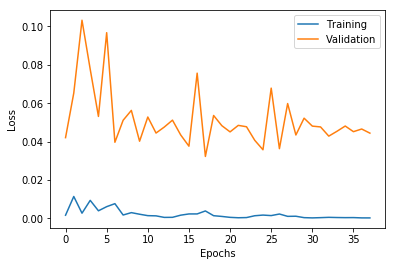

In [8]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [9]:
prediction = model.predict(X_test)

In [10]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
Y_test = Y_test.reshape((len(Y_test), 1))

In [11]:
inv_prediction = np.concatenate((prediction, X_test[:, 1:]), axis=1)
inv_prediction = scaler.inverse_transform(inv_prediction)
inv_prediction = inv_prediction[:,0]

Y_test_inverse = np.concatenate((Y_test, X_test[:, 1:]), axis=1)
Y_test_inverse = scaler.inverse_transform(Y_test_inverse)
Y_test_inverse = Y_test_inverse[:,0]

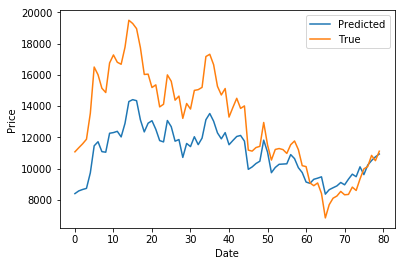

In [12]:
plt.figure()
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(inv_prediction)
plt.plot(Y_test_inverse)
plt.legend(['Predicted', 'True'])